## Selenium 이용한 웹 크롤링

#### Selenium

- 웹 사이트 동작(프론트엔드 측면)에 대한 테스트 자동화
- 웹 브라우저 조종
- 다소 느림
- 가상 브라우저에서는 어떠한 클릭이나 활동도 하지 말것!


라이브러리

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

from bs4 import BeautifulSoup 
import time
import pandas as pd

데이터 불러오기

In [2]:
df = pd.read_excel('result_210623_1530.xlsx', encoding='utf-8')
df.head()

,Title,Date,Article,URL,PressCompany
0,"[인터뷰 종합]""'여고괴담' 코인 기대해""…김형서, '뮤지션 비비'와 배우의 두 얼굴",2021.06.22. 오후 3:55,김형서(23)가 '뮤지션 비비'가 아닌 배우 타이틀에 용기 있게 도전했다.기억을 잃...,https://news.naver.com/main/read.nhn?mode=LSD&...,스포츠조선
1,"비비 ""롤모델? 박찬욱 감독…박정민, 내가 대본 쓴 MV에 캐스팅하고파"" [MD인터뷰③]",2021.06.22. 오후 2:29,신예 김형서(활동명 비비(BIBI)·22)가 롤모델로 박찬욱 감독을 지목하며 배우...,https://news.naver.com/main/read.nhn?mode=LSD&...,마이데일리
2,"배우 이제훈, 매니지먼트 컴퍼니온 설립 [공식]",2021.06.21. 오전 9:17,배우 이제훈이 매니지먼트 컴퍼니온을 설립하며 새로운 시작을 알렸다.컴퍼니온 측은 ...,https://news.naver.com/main/read.nhn?mode=LSD&...,이데일리
3,배우 이제훈 매니지먼트 사업 뛰어든다,2021.06.21. 오전 9:41,"니온 설립, 다양한 활동 예고 \n배우 이제훈이 매니지먼트 사업을 시작한다. 21일...",https://news.naver.com/main/read.nhn?mode=LSD&...,아시아경제
4,김혜수·조인성·염정아·박정민… 류승완 감독 신작 '밀수' 크랭크인(공식),2021.06.11. 오전 9:37,"은 바다에서 펼쳐지는 위험천만한 밀수 작전을 그려낼 영화 '밀수'가 김혜수, 염정아...",https://news.naver.com/main/read.nhn?mode=LSD&...,YTN


가상 브라우저 준비

In [5]:
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 

<br>

### 구글 번역 예제

구글번역 페이지 open

In [6]:
translate_url = 'https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko#view=home&op=translate&sl=auto&tl=en' 
# hl=ko : Korean & tl=en : English

driver.get(translate_url) # Get the page
print(driver.current_url)

https://translate.google.co.kr/?sl=auto&tl=en&op=translate&hl=ko


텍스트 입력

In [7]:
origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[1]/span/span/div/textarea'

driver.find_element_by_xpath(origin_xpath).send_keys('파이썬을 잘하고 싶어요')

번역 결과 출력

In [8]:
translation_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[2]/div[5]/div/div[1]/span[1]/span/span'

translated_contents = driver.find_element_by_xpath(translation_xpath) # XPath

translated_contents.text 

'I want to do Python well.'

<br>

### 기사글 번역 & 크롤링

번역할 기사

In [28]:
article = df.Article[8]
article

" 영화 '밀수'(감독 류승완)가 배우 김혜수, 염정아, 조인성, 박정민, 고민시, 김종수 등 다채로운 매력을 지닌 배우들의 캐스팅을 확정짓고 5일 크랭크인했다.'밀수'는 1970년대 평화롭던 작은 바닷마을을 배경으로 밀수에 휘말리게 된 두 여자의 범죄활극.영화 '국가부도의 날', '굿바이 싱글과 드라마 '하이에나', '시그널' 등 출연하는 작품마다 독보적인 존재감을 발산하는 김혜수와 '시동', '완벽한 타인', '스카이 캐슬' 등 영화와 드라마를 넘나들며 대체불가 연기력으로 대중들의 마음을 사로잡은 염정아, '안시성'과 '더 킹', '어쩌다 사장' 등 영화부터 예능까지 두루 섭렵하며 다채로운 연기는 물론 넘치는 매력을 보여주고 있는 조인성이 '밀수'를 통해 첫 호흡을 맞출 예정이어서 기대를 모은다. \n여기에 '다만 악에서 구하소서', '시동', '사바하' 등 다양한 캐릭터들을 완벽히 소화해내며 믿고 보는 배우로 등극한 박정민, '마녀'와 '오월의 청춘', '스위트홈' 등 다양한 작품에서 넘치는 끼와 매력으로 이목을 집중시키는 고민시 그리고 '삼진그룹 영어토익반', '시동', '극한직업' 등 다양한 작품을 통해 부드러운 카리스마를 보여주고 있는 김종수까지 합류해 이제껏 보지 못한 신선한 캐스팅 라인업을 완성했다.'밀수'의 연출을 맡은 류승완 감독은 이번 작품을 통해 광활한 바다를 배경으로 펼쳐질 시원한 액션으로 관객들에게 새로운 즐거움을 선사할 예정이다.'밀수'는 전국을 누비며 5개월간의 촬영에 돌입했다."

In [29]:
# 전처리
article = article.replace(' \n', '')
article

" 영화 '밀수'(감독 류승완)가 배우 김혜수, 염정아, 조인성, 박정민, 고민시, 김종수 등 다채로운 매력을 지닌 배우들의 캐스팅을 확정짓고 5일 크랭크인했다.'밀수'는 1970년대 평화롭던 작은 바닷마을을 배경으로 밀수에 휘말리게 된 두 여자의 범죄활극.영화 '국가부도의 날', '굿바이 싱글과 드라마 '하이에나', '시그널' 등 출연하는 작품마다 독보적인 존재감을 발산하는 김혜수와 '시동', '완벽한 타인', '스카이 캐슬' 등 영화와 드라마를 넘나들며 대체불가 연기력으로 대중들의 마음을 사로잡은 염정아, '안시성'과 '더 킹', '어쩌다 사장' 등 영화부터 예능까지 두루 섭렵하며 다채로운 연기는 물론 넘치는 매력을 보여주고 있는 조인성이 '밀수'를 통해 첫 호흡을 맞출 예정이어서 기대를 모은다.여기에 '다만 악에서 구하소서', '시동', '사바하' 등 다양한 캐릭터들을 완벽히 소화해내며 믿고 보는 배우로 등극한 박정민, '마녀'와 '오월의 청춘', '스위트홈' 등 다양한 작품에서 넘치는 끼와 매력으로 이목을 집중시키는 고민시 그리고 '삼진그룹 영어토익반', '시동', '극한직업' 등 다양한 작품을 통해 부드러운 카리스마를 보여주고 있는 김종수까지 합류해 이제껏 보지 못한 신선한 캐스팅 라인업을 완성했다.'밀수'의 연출을 맡은 류승완 감독은 이번 작품을 통해 광활한 바다를 배경으로 펼쳐질 시원한 액션으로 관객들에게 새로운 즐거움을 선사할 예정이다.'밀수'는 전국을 누비며 5개월간의 촬영에 돌입했다."

In [30]:
origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[1]/span/span/div/textarea'
driver.find_element_by_xpath(origin_xpath).clear() 
driver.find_element_by_xpath(origin_xpath).send_keys(article)
time.sleep(3)

translation_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[2]/div[5]/div/div[1]/span[1]/span/span'
translated_contents = driver.find_element_by_xpath(translation_xpath).text

print('기사글 [ {} ] 의 번역이 끝났습니다.'.format(df['Title'][0]))
print(translated_contents)

기사글 [ [인터뷰 종합]"'여고괴담' 코인 기대해"…김형서, '뮤지션 비비'와 배우의 두 얼굴 ] 의 번역이 끝났습니다.
The movie 'Smuggling' (director Ryu Seung-wan) confirmed the casting of actors with colorful charm, including actress Kim Hye-soo, custody, Join Province, Park Jung Min, and Kim Jong Soo, and cranked 5 days. "Smuggling" The two women of the two women who were killed by smuggling. Kim Hye-soo, 'Boots', 'Boots', 'Boots', 'Goodbye Single and Drama' Hyena, 'Signal' I am in the film and the drama, such as the movie and the drama, such as "Sky Castle", and the replacement figures, I have been in a feminine, "Anshine" and 'King', and 'How', Join Province, which shows full charm, is scheduled for the first respiration through 'Smuggling'. Here, 'Justice from the evil, and' Boots', 'Boots', and' Sava Ha ', and the actor who believes in trust Park Jung-min, a "witch" and 'Yun of the Witch', and 'Suite', and 'Suite', and 'Suites', "Strong Group English TOEO",' Stunning ',' We have completed a fresh casting lineup that we have ne

종료

In [31]:
# 창 닫음
driver.close()

# 프로세스 종료
driver.quit()

기사 원문 전체 번역

In [ ]:
eng_contents = []

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
# driver = webdriver.PhantomJS('(driver) phantomjs.exe')

translate_url = 'https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko#view=home&op=translate&sl=auto&tl=en' 
driver.get(translate_url) 
print(driver.current_url)
time.sleep(3)

for row_index, row in df.iterrows():
    origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[1]/span/span/div/textarea'
    driver.find_element_by_xpath(origin_xpath).clear()
    driver.find_element_by_xpath(origin_xpath).send_keys(df['Article'][row_index])
    time.sleep(3)

    translation_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[2]/div[5]/div/div[1]/span[1]/span/span'
    translated_contents = driver.find_element_by_xpath(translation_xpath).text
    eng_contents.append(translated_contents)
    print('기사글 [ {} ] 의 번역이 끝났습니다.'.format(df['Title'][row_index]))

print('전체 contents 번역이 끝났습니다!')

driver.close()
driver.quit()


df['Translated_article'] = eng_contents
df.to_excel('translation_result.xlsx', index=False, encoding='utf-8')

print('crawling_result.xlsx 파일로 전체 저장이 완료되었습니다!')

<br>

### 영어 워드클라우드

단어 빈도 counting

In [39]:
from collections import Counter
from konlpy.tag import Okt

articles = df['Article'].tolist()
articles = ''.join(articles)

twitter = Okt()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True)

# 불용어, 의미 없는 단어 제거
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
del_list.append('김형')

word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            word_cleaned.append(word[0])

# 단어 개수 count
word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('박정민', 96),
 ('배우', 83),
 ('영화', 67),
 ('연기', 47),
 ('싶다', 44),
 ('가다', 40),
 ('기적', 33),
 ('감독', 32),
 ('없다', 31),
 ('퀴즈', 30),
 ('생각', 27),
 ('통해', 26),
 ('블럭', 24),
 ('이야기', 23),
 ('사람', 23),
 ('같다', 21),
 ('tvN', 21),
 ('보다', 20),
 ('선배', 20),
 ('학교', 19),
 ('작품', 18),
 ('들다', 18),
 ('오다', 18),
 ('좋다', 18),
 ('시간', 17),
 ('출연', 17),
 ('아저씨', 17),
 ('너무', 16),
 ('자다', 16),
 ('기자', 16),
 ('한예종', 16),
 ('매력', 15),
 ('많이', 15),
 ('캐릭터', 15),
 ('캐스팅', 15),
 ('방송', 15),
 ('자퇴', 15),
 ('도전', 14),
 ('만나다', 14),
 ('그래서', 14),
 ('해보다', 14),
 ('보고', 14),
 ('라며', 14),
 ('밀수', 14),
 ('박원상', 14),
 ('기억', 13),
 ('대한', 13),
 ('나오다', 13),
 ('이제훈', 13),
 ('드라마', 13),
 ('2일', 13),
 ('5년', 13),
 ('임윤아', 13),
 ('처음', 12),
 ('받다', 12),
 ('지금', 12),
 ('밝히다', 12),
 ('많다', 12),
 ('다시', 12),
 ('공부', 12),
 ('털다', 12),
 ('무명', 12),
 ('아버지', 12),
 ('포스터', 12),
 ('이성민', 12),
 ('서다', 11),
 ('모습', 11),
 ('다양하다', 11),
 ('함께', 11),
 ('늘다', 11),
 ('열심히', 11),
 ('촬영', 11),
 ('예술', 11),
 ('고려대', 11),
 ('여고괴담', 10),


빈도 순으로 상위 100개만 선택하여 번역

In [40]:
translation_target = sorted_word_dic[:100]
translation_target[-1] # 마지막 (100위 단어의 빈도수) 확인

('이수경', 9)

In [41]:
translation_target = {} # dict

for item in word_dic:
    # item == dict의 key -> dict[key] = value
    if word_dic[item] >= 9: # 위에서 확인한 빈도수를 기반으로 번역 대상 단어를 선정합니다.
        translation_target[item] = word_dic[item] # translation_target = {'key': 'count(value)'} dict

In [42]:
print(translation_target)

{'가다': 40, '배우': 83, '도전': 14, '기억': 13, '학교': 19, '만나다': 14, '시간': 17, '이야기': 23, '영화': 67, '여고괴담': 10, '감독': 32, '맡다': 10, '통해': 26, '작품': 18, '대한': 13, '프로그램': 9, '예능': 9, '매력': 15, '연기': 47, '자신': 9, '서다': 11, '같다': 21, '너무': 16, '들다': 18, '그래서': 14, '처음': 12, '오다': 18, '보다': 20, '없다': 31, '그냥': 9, '해보다': 14, '싶다': 44, '보고': 14, '생각': 27, '데뷔': 9, '모습': 11, '대해': 9, '출연': 17, '자다': 16, '많이': 15, '받다': 12, '지금': 12, '좋다': 18, '선배': 20, '호흡': 9, '나오다': 13, '들어가다': 10, '라며': 14, '해주다': 10, '내다': 9, '다양하다': 11, '밝히다': 12, '많다': 12, '그리고': 9, '끝나다': 9, '캐릭터': 15, '함께': 11, '박정민': 96, '늘다': 11, '기자': 16, '오후': 9, '캐스팅': 15, '이제훈': 13, '새롭다': 9, '담다': 9, '사람': 23, '드라마': 13, '대중': 9, '다시': 12, '연출': 9, '열심히': 11, '밀수': 14, '촬영': 11, '예술': 11, '입학': 10, '공부': 12, '그때': 9, '2일': 13, '방송': 15, 'tvN': 21, '퀴즈': 30, '블럭': 24, '자퇴': 15, '한예종': 16, '떨어지다': 9, '고려대': 11, '털다': 12, '5년': 13, '무명': 12, '아버지': 12, '친구': 9, '박원상': 14, '아저씨': 17, '극단': 9, '포스터': 12, '이성민': 12, '기적': 33, '임윤아': 13, '이수

In [43]:
translation_result = {}

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') 
# driver = webdriver.PhantomJS('(driver) phantomjs.exe')

translate_url = 'https://translate.google.co.kr/?um=1&ie=UTF-8&hl=ko#view=home&op=translate&sl=auto&tl=en'
driver.get(translate_url) 
print(driver.current_url)
time.sleep(3)
    
for key in translation_target:
    
    origin_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[1]/span/span/div/textarea'
    driver.find_element_by_xpath(origin_xpath).clear()
    driver.find_element_by_xpath(origin_xpath).send_keys(key)
    time.sleep(3)

    translated_xpath = '/html/body/c-wiz/div/div[2]/c-wiz/div[2]/c-wiz/div[1]/div[2]/div[2]/c-wiz[2]/div[5]/div/div[1]/span[1]/span/span'
    translated_contents = driver.find_element_by_xpath(translated_xpath).text
    
    translation_result[translated_contents] = translation_target[key] 
    print('단어 \'{}\'의 번역 완료 : {}'.format(key, translated_contents))

print('전체 번역이 끝났습니다!')

driver.close()
driver.quit()

https://translate.google.co.kr/?sl=auto&tl=en&op=translate&hl=ko
단어 '가다'의 번역 완료 : go
단어 '배우'의 번역 완료 : Actor
단어 '도전'의 번역 완료 : challenge
단어 '기억'의 번역 완료 : Memory
단어 '학교'의 번역 완료 : school
단어 '만나다'의 번역 완료 : meet
단어 '시간'의 번역 완료 : time
단어 '이야기'의 번역 완료 : story
단어 '영화'의 번역 완료 : movie
단어 '여고괴담'의 번역 완료 : Ghost
단어 '감독'의 번역 완료 : director
단어 '맡다'의 번역 완료 : take on
단어 '통해'의 번역 완료 : through
단어 '작품'의 번역 완료 : Work
단어 '대한'의 번역 완료 : About
단어 '프로그램'의 번역 완료 : program
단어 '예능'의 번역 완료 : Entertainment
단어 '매력'의 번역 완료 : Charm
단어 '연기'의 번역 완료 : Acting
단어 '자신'의 번역 완료 : Myself
단어 '서다'의 번역 완료 : stand
단어 '같다'의 번역 완료 : same
단어 '너무'의 번역 완료 : Too
단어 '들다'의 번역 완료 : Hold
단어 '그래서'의 번역 완료 : so
단어 '처음'의 번역 완료 : first
단어 '오다'의 번역 완료 : come
단어 '보다'의 번역 완료 : see
단어 '없다'의 번역 완료 : none
단어 '그냥'의 번역 완료 : just
단어 '해보다'의 번역 완료 : try
단어 '싶다'의 번역 완료 : want
단어 '보고'의 번역 완료 : report
단어 '생각'의 번역 완료 : think
단어 '데뷔'의 번역 완료 : debut
단어 '모습'의 번역 완료 : shape
단어 '대해'의 번역 완료 : about
단어 '출연'의 번역 완료 : Exit
단어 '자다'의 번역 완료 : sleep
단어 '많이'의 번역 완료 : A lot of


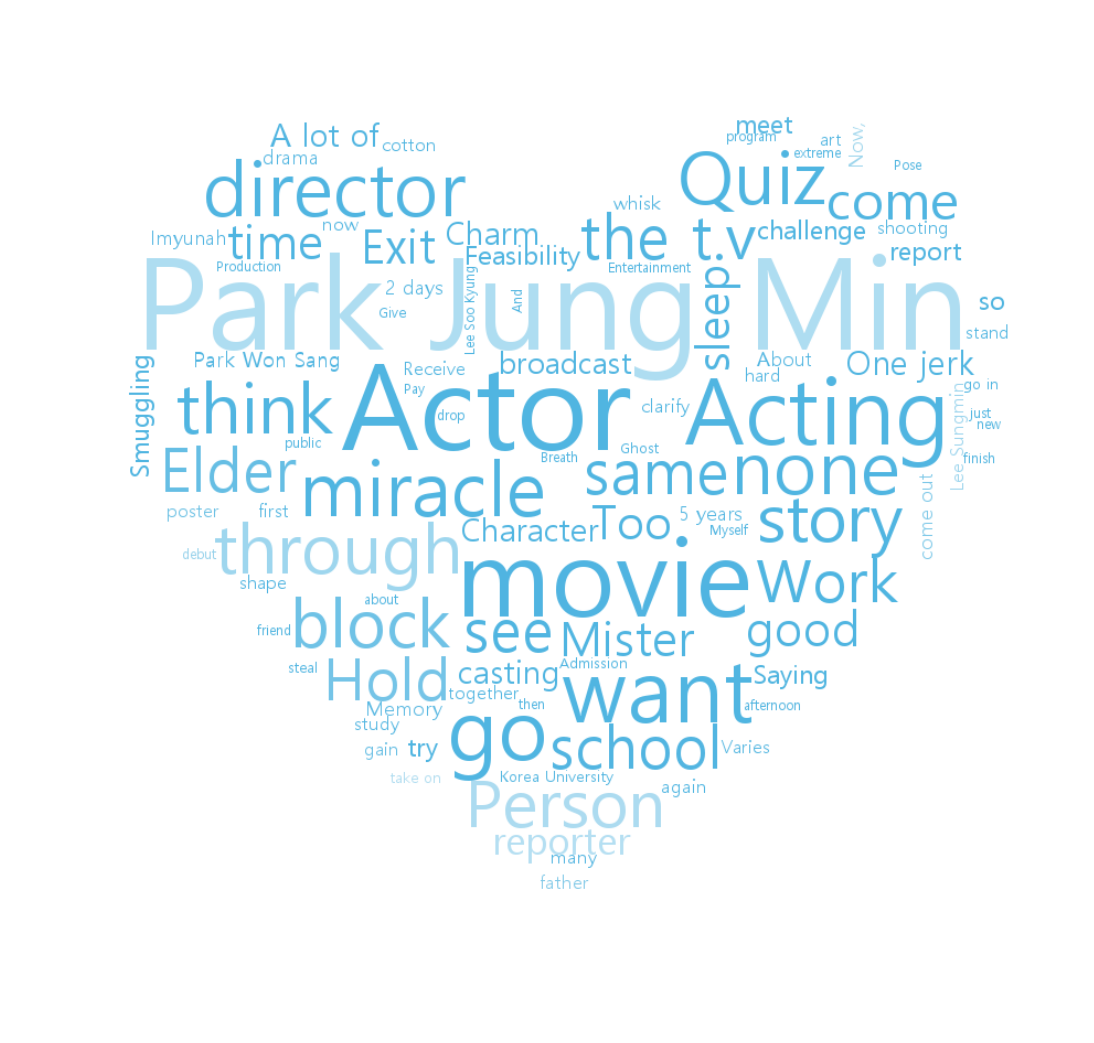

In [45]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator 
import matplotlib.pyplot as plt
%matplotlib inline

cloud_image = np.array(Image.open("image/wordcloud3.jpg"))
image_colors = ImageColorGenerator(cloud_image)

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", 
                       width=2000, height=1000,  
                       mask=cloud_image, 
                       background_color='white').generate_from_frequencies(translation_result)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') 
# plt.imshow(word_cloud.recolor(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()